# Projeto II

In [1]:
# bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings  

warnings.filterwarnings('ignore') 

In [2]:
# dados
df = pd.read_csv('dataset.csv', parse_dates=['Data_Pedido'], date_format='%d/%m/%Y')
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [3]:
# informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9700 entries, 0 to 9699
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID_Pedido     9700 non-null   object        
 1   Data_Pedido   9700 non-null   datetime64[ns]
 2   ID_Cliente    9700 non-null   object        
 3   Segmento      9700 non-null   object        
 4   Pais          9700 non-null   object        
 5   Cidade        9700 non-null   object        
 6   Estado        9700 non-null   object        
 7   ID_Produto    9700 non-null   object        
 8   Categoria     9700 non-null   object        
 9   SubCategoria  9700 non-null   object        
 10  Valor_Venda   9700 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 833.7+ KB


## Perguntas de negócios

### 1 - Qual cidade com maior valor de venda de produtos da categoria 'Office Supplies'?

In [4]:
df[df['Categoria'] == 'Office Supplies'].groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values('Valor_Venda', ascending=False).iloc[0,0]

'New York City'

### 2 - Qual o total de vendas por data do pedido?

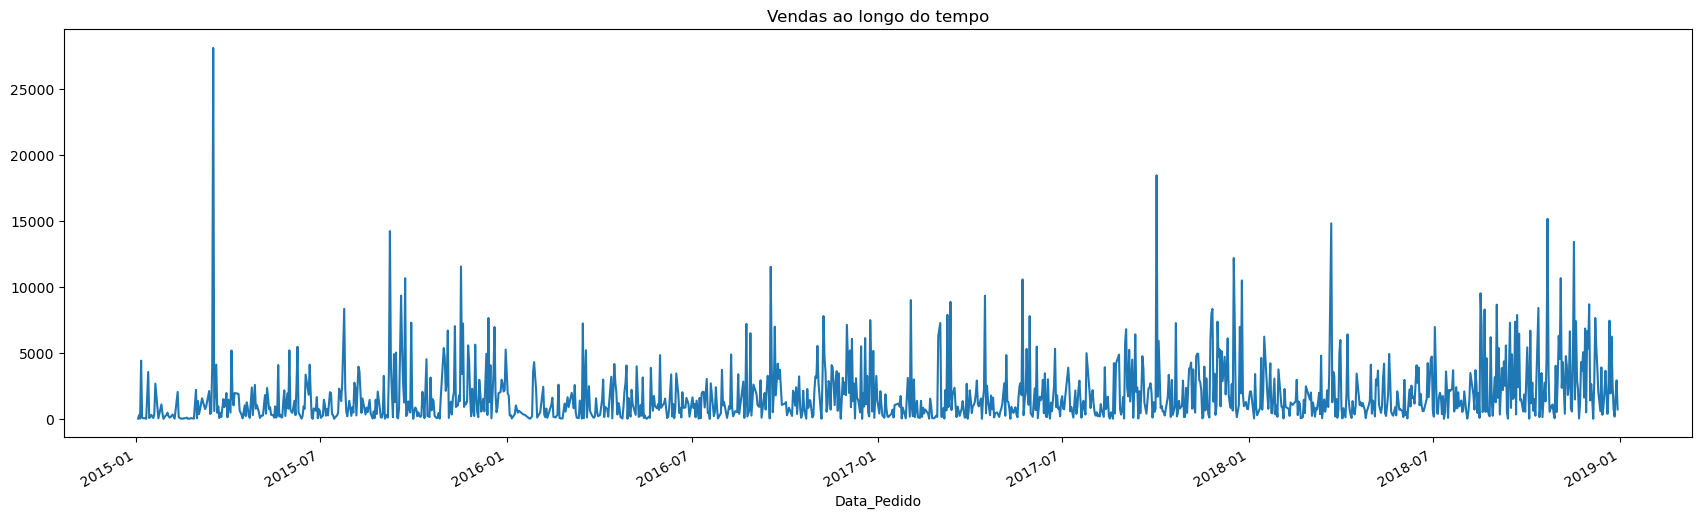

In [5]:
df_p2 = df.groupby('Data_Pedido')['Valor_Venda'].sum()

plt.figure(figsize = (21,6))
df_p2.plot(x = 'Data_Pedido', y = 'Valor_Venda')
plt.title('Vendas ao longo do tempo', loc='center')
plt.show()

### 3 - Qual o total de vendas por Estado?

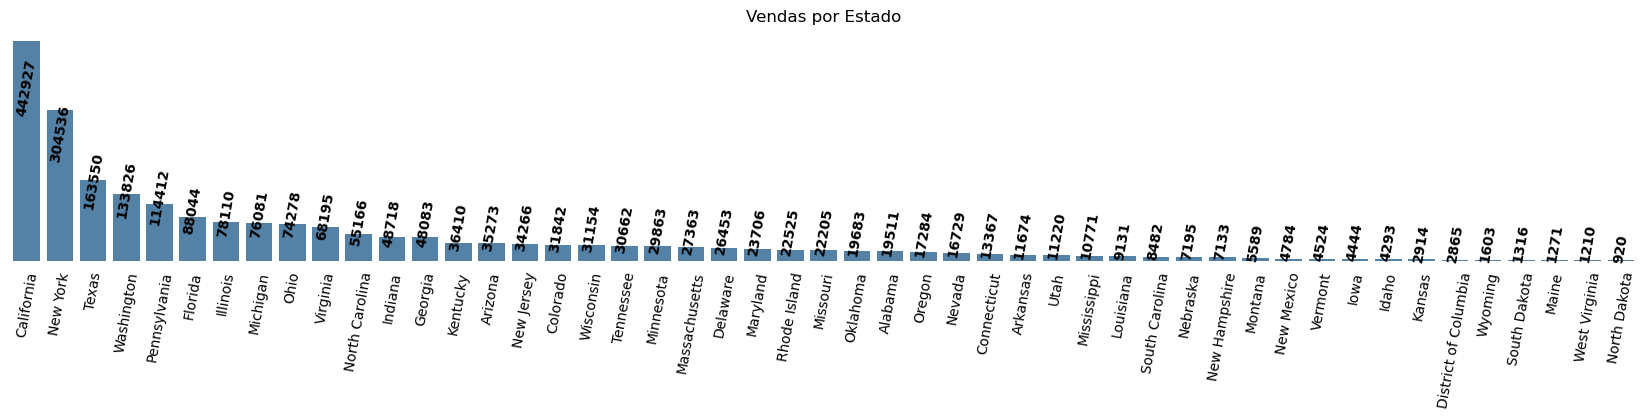

In [6]:
df_p3 = df.groupby('Estado').sum('Valor_Venda').reset_index().sort_values('Valor_Venda', ascending=False)

plt.figure(figsize = (21,3))
sns.barplot(df_p3, x ='Estado', y='Valor_Venda', color='steelblue')
plt.xticks(rotation = 80)
plt.title('Vendas por Estado')
plt.gca().get_yaxis().set_visible(False)
plt.xlabel('')
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tick_params(bottom=False)

for i in range(len(df_p3)):
        plt.text(x=i, y=df_p3.iloc[i,1]/1.5, s=round(df_p3.iloc[i,1]), ha = 'center', rotation=80, weight='bold')

plt.show()

### 4 - Quais são as 10 cidades com maior total de vendas?

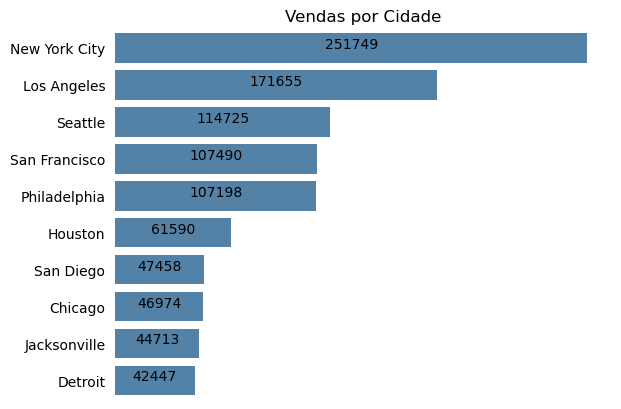

In [7]:
df_p4 = df.groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values('Valor_Venda', ascending=False).head(10)

sns.barplot(df_p4, x = 'Valor_Venda', y = 'Cidade', color = 'steelblue')
plt.title('Vendas por Cidade')
plt.gca().get_xaxis().set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tick_params(left=False)
plt.ylabel('')

for i in range(len(df_p4)):
    plt.text(x=df_p4.iloc[i,1]/2, y=i, s=round(df_p4.iloc[i,1]), ha='center')

plt.show()

### 5 - Qual segmento teve o maior total de vendas?

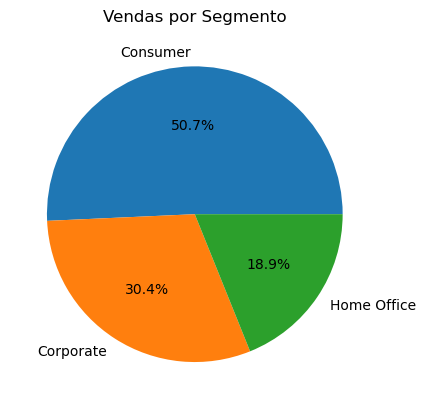

In [8]:
df_p5 = df.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values('Valor_Venda', ascending=False)

fig, ax = plt.subplots()
ax.pie(df_p5['Valor_Venda'], labels = df_p5['Segmento'], autopct='%1.1f%%')
plt.title('Vendas por Segmento')
plt.show()

### 6 - Qual o total de vendas por Segmento e por Ano?

In [9]:
df['Ano'] = df['Data_Pedido'].dt.year
df = df.iloc[:,[0,1,11,2,3,4,5,6,7,8,9,10]]
df.groupby(['Segmento', 'Ano'])['Valor_Venda'].sum()

Segmento     Ano 
Consumer     2015    256719.9166
             2016    265295.2593
             2017    288459.5572
             2018    323359.6019
Corporate    2015    125819.5957
             2016    114643.1229
             2017    203266.7398
             2018    235502.7284
Home Office  2015     88229.0878
             2016     74134.1332
             2017    103639.6270
             2018    156488.5849
Name: Valor_Venda, dtype: float64

### 7 - Simulação

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:
 - Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
 - Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

Quantas Vendas Receberiam 15% de Desconto?

In [10]:
r = [1 for i in df['Valor_Venda'] if i>1000]
print('Do total de vendas, {} receberiam 15% de desconto'.format(sum(r)))
print('Enquanto {} receberiam 10% de desconto'.format(len(df) - sum(r)))

Do total de vendas, 457 receberiam 15% de desconto
Enquanto 9243 receberiam 10% de desconto


### 8 - Valor de Venda pós-simulação

Considere que a empresa decida conceder o desconto de 15% do item anterior. Qual
seria a média do Valor de Venda antes e depois do desconto?

In [11]:
df['Valor_Venda_Desconto'] = [round(i-i*0.15,2) if i>1000 else i for i in df['Valor_Venda']]

print('Média GERAL do Valor de Vendas sem desconto: {}'.format(round(df['Valor_Venda'].mean(), 2)))
print('Média GERAL do Valor de Vendas com desconto: {}'.format(round(df['Valor_Venda_Desconto'].mean(), 2)))

diff_geral = df['Valor_Venda'].mean() - df['Valor_Venda_Desconto'].mean()
print('Diferença GERAL absoluta: {}'.format(round(diff_geral,2)))

Média GERAL do Valor de Vendas sem desconto: 230.47
Média GERAL do Valor de Vendas com desconto: 215.51
Diferença GERAL absoluta: 14.96


In [12]:
media_desconto15_ant = df[df['Valor_Venda'] != df['Valor_Venda_Desconto']]['Valor_Venda'].mean()
media_desconto15_pos = df[df['Valor_Venda'] != df['Valor_Venda_Desconto']]['Valor_Venda_Desconto'].mean()

print('Média do Valor de Vendas sem desconto: {}'.format(round(media_desconto15_ant,2)))
print('Média do Valor de Vendas com desconto: {}'.format(round(media_desconto15_pos, 2)))

diff = media_desconto15_ant - media_desconto15_pos
print('Direfença absoluta: {}'.format(round(diff,2)))

Média do Valor de Vendas sem desconto: 2116.81
Média do Valor de Vendas com desconto: 1799.29
Direfença absoluta: 317.52


### 9 - Qual a média de vendas por Segmento, Ano e Mês?

In [13]:
df_p9 = df.groupby(['Segmento','Ano',df['Data_Pedido'].dt.month])['Valor_Venda'].mean()
df_p9

Segmento     Ano   Data_Pedido
Consumer     2015  1              146.736787
                   2              117.327926
                   3              152.170564
                   4              189.762750
                   5              191.337439
                                     ...    
Home Office  2018  8              176.160606
                   9              249.140597
                   10             412.576597
                   11             247.519423
                   12             224.523983
Name: Valor_Venda, Length: 144, dtype: float64

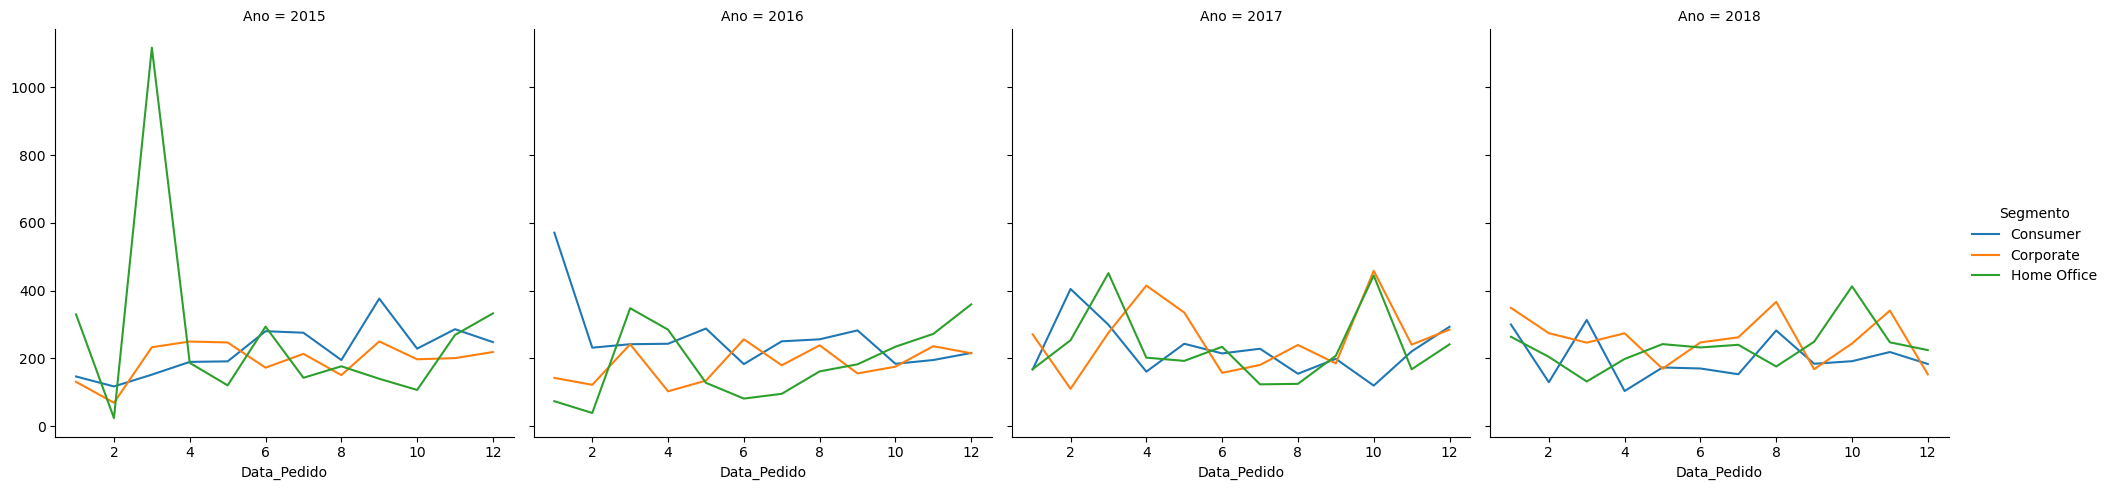

In [14]:
sns.relplot(data = df_p9, x = 'Data_Pedido', y = df_p9.values, hue = 'Segmento', kind = 'line', col = 'Ano')
plt.show()

### 10 - Qual o total de vendas por Categoria e Subcategoria, considerando somente as Top 12 Subcategorias?

In [15]:
# para as 12 subcategorias mais frequentes
top12 = df['SubCategoria'].value_counts()[:12].index
df_p10 = df[df['SubCategoria'].isin(top12)]
df_p10.groupby(['Categoria', 'SubCategoria'])['Valor_Venda'].sum()

Categoria        SubCategoria
Furniture        Chairs          317919.625
                 Furnishings      88862.770
                 Tables          202083.360
Office Supplies  Appliances      104061.693
                 Art              26573.736
                 Binders         194723.381
                 Envelopes        15791.182
                 Labels           12267.366
                 Paper            76312.764
                 Storage         216188.362
Technology       Accessories     162791.362
                 Phones          325271.294
Name: Valor_Venda, dtype: float64

In [16]:
# para as 12 subcategorias com maiores vendas
df_p10_1 = df.groupby(['Categoria', 'SubCategoria'])['Valor_Venda'].sum().reset_index().sort_values('Valor_Venda', ascending=False).head(12).sort_values('Categoria')

tot = df_p10_1.groupby('Categoria').sum('Valor_Venda').sort_values('Valor_Venda',ascending=False).reset_index()
tot

,Categoria,Valor_Venda
0,Technology,823549.3810
1,Furniture,716910.8017
2,Office Supplies,591286.2000
